<a href="https://colab.research.google.com/github/alokk2005/cnn-cat-vs-dog-classification/blob/main/cnn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
img_size = (128, 128)
batch_size = 32

In [3]:
(ds_train, ds_val), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.2BVHHZ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [4]:
def preprocess(img, label):
    img = tf.image.resize(img, img_size)
    img = img / 255.0
    return img, label

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = ds_train.map(preprocess).batch(batch_size).prefetch(AUTOTUNE)
val_ds = ds_val.map(preprocess).batch(batch_size).prefetch(AUTOTUNE)


In [6]:

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

In [7]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.5513 - loss: 0.6856 - val_accuracy: 0.7160 - val_loss: 0.5557
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.7257 - loss: 0.5469 - val_accuracy: 0.7711 - val_loss: 0.4896
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.7855 - loss: 0.4607 - val_accuracy: 0.7913 - val_loss: 0.4604
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.8192 - loss: 0.4033 - val_accuracy: 0.8205 - val_loss: 0.4105
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 45ms/step - accuracy: 0.8477 - loss: 0.3397 - val_accuracy: 0.8295 - val_loss: 0.4190
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.8799 - loss: 0.2816 - val_accuracy: 0.8102 - val_loss: 0.4921
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 53ms/step - accuracy: 0.9030 - loss: 0.2357 - val_accuracy: 0.8306 - val_loss: 0.4449
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.9258 - loss: 0.1904 - 

In [9]:
test_loss, test_acc = model.evaluate(val_ds)
print("Validation Accuracy:", test_acc)

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8393 - loss: 0.7658
Validation Accuracy: 0.8346947431564331


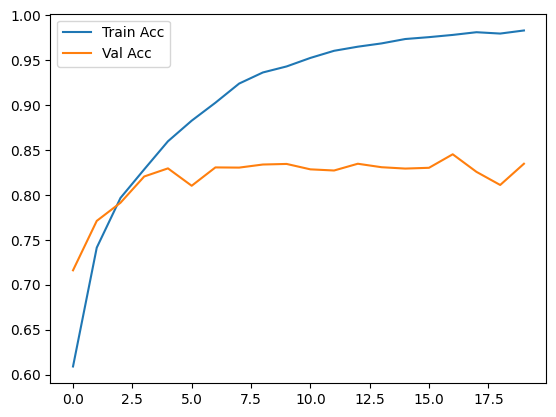

In [10]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

In [12]:
img = image.load_img("/content/rj4xrDA4vjAtkYrRB3xXK3pP5uHlbHc0O2Ye4DN9-AKh3NY9WBPGeGv4-JD3_v3KAGDuBrZrjMfnSoV-gju82XWN3_zmKng7rC-eLs8xbF8.jpg", target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Dog 🐶")
else:
    print("Cat 🐱")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Dog 🐶
